<a href="https://colab.research.google.com/github/goutam63/machine-learning-projects/blob/main/texas_salary_sneding_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Texas employees salary prediction 

## steps to predict the algorithams 

### loading the data 
### EDA
### Statical analysis
### Graphical analysis 
###### univariate 
###### Bivariate 
###### mutivariate 
### Data preprocessing 
### missing outliers 

In [ ]:
# import libraryes 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('salary.csv')

In [ ]:
#pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [ ]:
data

AGENCY                                        AGENCY NAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
0        JD25      JUDGE, RETIRED                                ...   
1        3524      GENERAL COUNSEL IV                            ...   
2        JD25      JUDGE, RETIRED                                ...   
3        3524      GENERAL COUNSEL IV                            ...   
4        4504      CORREC  OFFICER IV                            ...   
...           ...                                                ...   
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
0       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
1       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04454         4.0   
2       URP - UNCLASSIFIED REGULAR PART-TIME      ...  75.96150        29.0   
3       CTP - CLASSIFIED TEMPORARY PART-TIME      ...  81.04453         4.0   
4       CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
...                                          ...  ...       ...         ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...  12.93000        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...   0.00000       

In [ ]:
data.shape

(149481, 21)

In [ ]:
missing_data=data.isnull().sum()/data.shape[0]*100
missing_data

AGENCY                      0.000000
AGENCY NAME                 0.000000
LAST NAME                   0.000000
FIRST NAME                  0.000000
MI                          0.000000
CLASS CODE                  0.000000
CLASS TITLE                 0.000000
ETHNICITY                   0.000000
GENDER                      0.000000
STATUS                      0.000000
EMPLOY DATE                 0.000000
HRLY RATE                   0.000000
HRS PER WK                  0.000000
MONTHLY                     0.000000
ANNUAL                      0.000000
STATE NUMBER                0.000000
duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [ ]:
data_new=data.dropna(axis=1)
data_new.keys()

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [ ]:
data_new.columns=['AGENCY','AGENCYNAME','LASTNAME','FIRSTNAME','MI','CLASSCODE','CLASSTITLE','ETHNICITY','GENDER','STATUS','EMPLOYDATE','HRLYRATE','HRSPERWK','MONTHLY','ANNUAL','STATENUMBER']

In [ ]:
data_new

AGENCY                                         AGENCYNAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                              LASTNAME                       FIRSTNAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASSCODE                                         CLASSTITLE  \
0       JD25      JUDGE, RETIRED                                ...   
1       3524      GENERAL COUNSEL IV                            ...   
2       JD25      JUDGE, RETIRED                                ...   
3       3524      GENERAL COUNSEL IV                            ...   
4       4504      CORREC  OFFICER IV                            ...   
...          ...                                                ...   
149476  6232      SECURITY OFFICER III                          ...   
149477  0302      WEB ADMINISTRATOR III                         ...   
149478  0130      CUSTOMER SERVICE REP I                        ...   
149479  1572      PROGRAM SPECIALIST III                        ...   
149480  0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS EMPLOYDATE  HRLYRATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME       02/18/88  75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME       02/01/15  81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME       02/01/20  75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME       09/01/18  81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME         06/29/20   0.00000   
...                                          ...        ...       ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME         10/30/17   0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME         07/13/15   0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME         10/15/12  12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME         09/22/89   0.00000   
149480  CRP - CLASSIFIED REGULAR PART-TIME         02/16/12  11.74000

In [ ]:
import datetime
data_new['EMPLOYDATE']= data_new['EMPLOYDATE'].astype('datetime64[ns]')


In [ ]:
from datetime import datetime,date
today=str(date.today())
data_new['Dummy']= datetime.strptime(today, '%Y-%m-%d')

In [ ]:
data_new['EMPLOYDATE']= data_new['Dummy']-data_new['EMPLOYDATE']

In [ ]:
data_new.drop('Dummy', axis=1, inplace=True)

In [ ]:
data_new['EMPLOYDATE']= data_new['EMPLOYDATE'].dt.days

In [ ]:
data_new

AGENCY                                         AGENCYNAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                              LASTNAME                       FIRSTNAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASSCODE                                         CLASSTITLE  \
0       JD25      JUDGE, RETIRED                                ...   
1       3524      GENERAL COUNSEL IV                            ...   
2       JD25      JUDGE, RETIRED                                ...   
3       3524      GENERAL COUNSEL IV                            ...   
4       4504      CORREC  OFFICER IV                            ...   
...          ...                                                ...   
149476  6232      SECURITY OFFICER III                          ...   
149477  0302      WEB ADMINISTRATOR III                         ...   
149478  0130      CUSTOMER SERVICE REP I                        ...   
149479  1572      PROGRAM SPECIALIST III                        ...   
149480  0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  EMPLOYDATE  HRLYRATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME           12081  75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME            2236  81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME             410  75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME             928  81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME               261   0.00000   
...                                          ...         ...       ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME              1234   0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME              2074   0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME              3075  12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME             11499   0.00000   
149480  CRP - CLASSIFIED REGULAR PART-TIME              33

In [ ]:
data_new

AGENCY                                         AGENCYNAME  \
0          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1          212  OFFICE OF COURT ADMINISTRATION                ...   
2          241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3          212  OFFICE OF COURT ADMINISTRATION                ...   
4          696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...        ...                                                ...   
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                              LASTNAME                       FIRSTNAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASSCODE                                         CLASSTITLE  \
0       JD25      JUDGE, RETIRED                                ...   
1       3524      GENERAL COUNSEL IV                            ...   
2       JD25      JUDGE, RETIRED                                ...   
3       3524      GENERAL COUNSEL IV                            ...   
4       4504      CORREC  OFFICER IV                            ...   
...          ...                                                ...   
149476  6232      SECURITY OFFICER III                          ...   
149477  0302      WEB ADMINISTRATOR III                         ...   
149478  0130      CUSTOMER SERVICE REP I                        ...   
149479  1572      PROGRAM SPECIALIST III                        ...   
149480  0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  EMPLOYDATE  HRLYRATE  \
0       URP - UNCLASSIFIED REGULAR PART-TIME           12081  75.96150   
1       CTP - CLASSIFIED TEMPORARY PART-TIME            2236  81.04454   
2       URP - UNCLASSIFIED REGULAR PART-TIME             410  75.96150   
3       CTP - CLASSIFIED TEMPORARY PART-TIME             928  81.04453   
4       CRF - CLASSIFIED REGULAR FULL-TIME               261   0.00000   
...                                          ...         ...       ...   
149476  CRF - CLASSIFIED REGULAR FULL-TIME              1234   0.00000   
149477  CRF - CLASSIFIED REGULAR FULL-TIME              2074   0.00000   
149478  CRP - CLASSIFIED REGULAR PART-TIME              3075  12.93000   
149479  CRF - CLASSIFIED REGULAR FULL-TIME             11499   0.00000   
149480  CRP - CLASSIFIED REGULAR PART-TIME              33

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AGENCY       149481 non-null  int64  
 1   AGENCYNAME   149481 non-null  object 
 2   LASTNAME     149481 non-null  object 
 3   FIRSTNAME    149481 non-null  object 
 4   MI           149481 non-null  object 
 5   CLASSCODE    149481 non-null  object 
 6   CLASSTITLE   149481 non-null  object 
 7   ETHNICITY    149481 non-null  object 
 8   GENDER       149481 non-null  object 
 9   STATUS       149481 non-null  object 
 10  EMPLOYDATE   149481 non-null  int64  
 11  HRLYRATE     149481 non-null  float64
 12  HRSPERWK     149481 non-null  float64
 13  MONTHLY      149481 non-null  float64
 14  ANNUAL       149481 non-null  float64
 15  STATENUMBER  149481 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 18.2+ MB


In [ ]:
data_new['EMPLOYDATE'].value_counts()

1293     12359
1658      3261
6041      1529
289       1171
410        767
         ...  
13641        1
1231         1
1103         1
3022         1
2049         1
Name: EMPLOYDATE, Length: 6295, dtype: int64

In [ ]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
numaric_data=data_new.select_dtypes(include=['int64','float64'])
numaric_data

AGENCY  EMPLOYDATE  HRLYRATE  HRSPERWK  MONTHLY     ANNUAL  \
0          241       12081  75.96150      29.0  9545.82  114549.84   
1          212        2236  81.04454       4.0  1404.77   16857.24   
2          241         410  75.96150      29.0  9545.82  114549.84   
3          212         928  81.04453       4.0  1404.77   16857.24   
4          696         261   0.00000      40.0  3284.27   39411.24   
...        ...         ...       ...       ...      ...        ...   
149476     809        1234   0.00000      40.0  2899.00   34788.00   
149477     809        2074   0.00000      40.0  5500.00   66000.00   
149478     809        3075  12.93000      20.0  1120.60   13447.20   
149479     809       11499   0.00000      40.0  5744.16   68929.92   
149480     809        3317  11.74000      20.0  1017.46   12209.52   

        STATENUMBER  
0            127717  
1            127717  
2             59115  
3             59115  
4            165030  
...             ...  
149476       770781  
149477       847431  
149478        34266  
149479       123490  
149480       103583  

[149481 rows x 7 columns]

# visulization of numaric data 

In [ ]:
#sns.set(rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":10,"ytick.labelsize":10,
           # "legend.fontsize":12})
#plt.figure(figsize=(12,10))

#txt = "Statistical Analysis of Numerical type data"
#x = txt.center(134)
#print(f"\033[1m\n{x}\n")

#for index,cols in enumerate(numaric_data):
    #plt.subplot(3,3,index+1)
    #sns.distplot(numaric_data.loc[:,cols],kde=True,bins=30)
#plt.tight_layout(pad=2)

In [ ]:
#plt.figure(figsize=(20,15))
#sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15,"xtick.labelsize":14,"ytick.labelsize":12,
           # "legend.fontsize":12})

#plt.subplot(3, 3, 1)
#sns.scatterplot(data_new["AGENCY"],data_new["ANNUAL"])
#plt.title("\nAgency vs Annual\n",fontweight="bold")
#plt.ylabel("annual\n")

#plt.subplot(3, 3, 2)
#sns.barplot(data_new["GENDER"],data_new["ANNUAL"])
#plt.title("\nGender vs Annual\n",fontweight="bold")
#plt.ylabel("Annual\n")


In [ ]:
#plt.figure(figsize=(20,15))

#sns.set(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":13,"xtick.labelsize":12,"ytick.labelsize":10,
            #"legend.fontsize":12})

#plt.subplot(2, 2, 1)
#sns.scatterplot(data_new["HRLY RATE"],data_new["ANNUAL"])
#plt.title("\nANNUAL Salary on the basis of HRLYRATE\n",fontsize=15,fontweight="bold")
#plt.ylabel("ANNUAL Salary\n")

#plt.subplot(2, 2, 2)
#sns.scatterplot(data_new["HRS PER WK"],data_new["ANNUAL"])
#plt.title("\nANNUAL Salary on the basis of HRSPERWK\n",fontsize=15,fontweight="bold")
#plt.ylabel("ANNUAL Salary\n")

In [ ]:
numaric_data.columns

Index(['AGENCY', 'EMPLOYDATE', 'HRLYRATE', 'HRSPERWK', 'MONTHLY', 'ANNUAL',
       'STATENUMBER'],
      dtype='object')

In [ ]:
#plt.figure(figsize=(10,10))
#sns.displot(data_new, x="EMPLOY DATE", binwidth=100,bins=10)

In [ ]:
#sns.displot(data_new, x="HRLY RATE", binwidth=15)

In [ ]:
#sns.displot(data_new, x="HRS PER WK", binwidth=5)

In [ ]:
#sns.displot(data_new, x="MONTHLY", binwidth=10,bins=10)

In [ ]:
#sns.displot(data_new, x="ANNUAL", binwidth=35)

In [ ]:
#sns.displot(data_new, x="STATE NUMBER", binwidth=35,bins=30)

# Bivariate analysis 

In [ ]:
#sns.displot(data_new, x="AGENCY", y="ANNUAL", kind="kde")

In [ ]:
#sns.displot(data_new, x="EMPLOY DATE", y="ANNUAL", kind="kde")

In [ ]:
#sns.displot(data_new, x="HRLY RATE", y="ANNUAL", kind="kde")

In [ ]:
#sns.displot(data_new, x="HRS PER WK", y="ANNUAL", kind="kde")

In [ ]:
#sns.displot(data_new, x="STATE NUMBER", y="ANNUAL", kind="kde")

<AxesSubplot:>

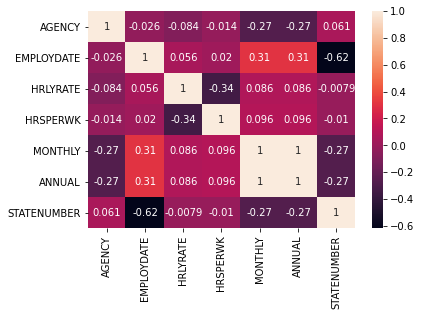

In [ ]:
sns.heatmap(data_new.corr(),annot=True)

In [ ]:
data_new.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
#plt.figure(figsize=(20,10))
#sns.lineplot(data=data_new)
#plt.show()

In [ ]:
categorical_data=data_new.select_dtypes(exclude=['int64','float64'])
categorical_data

AGENCYNAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                              LASTNAME                       FIRSTNAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASSCODE                                         CLASSTITLE  \
0       JD25      JUDGE, RETIRED                                ...   
1       3524      GENERAL COUNSEL IV                            ...   
2       JD25      JUDGE, RETIRED                                ...   
3       3524      GENERAL COUNSEL IV                            ...   
4       4504      CORREC  OFFICER IV                            ...   
...          ...                                                ...   
149476  6232      SECURITY OFFICER III                          ...   
149477  0302      WEB ADMINISTRATOR III                         ...   
149478  0130      CUSTOMER SERVICE REP I                        ...   
149479  1572      PROGRAM SPECIALIST III                        ...   
149480  0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  
0       URP - UNCLASSIFIED REGULAR PART-TIME      
1       CTP - CLASSIFIED TEMPORARY PART-TIME      
2       URP - UNCLASSIFIED REGULAR PART-TIME      
3       CTP - CLASSIFIED TEMPORARY PART-TIME      
4       CRF - CLASSIFIED REGULAR FULL-TIME        
...                                          ...  
149476  CRF - CLASSIFIED REGULAR FULL-TIME        
149477  CRF - CLASSIFIED REGULAR FULL-TIME        
149478  CRP - CLASSIFIED REGULAR PART-TIME        
149479  CRF - CLASSIFIED REGULAR FULL-TIME        
149480  CRP - CLASSIFIED REGULAR PART-TIME        

[149481 rows x 9 columns]

In [ ]:
#sns.catplot(x="AGENCY NAME", y="ANNUAL", hue="CLASS TITLE", kind="bar", data=dat0a_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="AGENCY NAME", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="LAST NAME", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="FIRST NAME", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="MI", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="CLASS CODE", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="CLASS TITLE", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="ETHNICITY", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="GENDER", y="ANNUAL",data=data_new)

In [ ]:
#plt.figure(figsize=(20,10))
#sns.catplot(x="STATUS", y="ANNUAL",data=data_new)

# catagorical encoding 

In [ ]:
categorical_data

AGENCYNAME  \
0       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1       OFFICE OF COURT ADMINISTRATION                ...   
2       COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3       OFFICE OF COURT ADMINISTRATION                ...   
4       TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
...                                                   ...   
149476  STATE PRESERVATION BOARD                      ...   
149477  STATE PRESERVATION BOARD                      ...   
149478  STATE PRESERVATION BOARD                      ...   
149479  STATE PRESERVATION BOARD                      ...   
149480  STATE PRESERVATION BOARD                      ...   

                              LASTNAME                       FIRSTNAME MI  \
0       RUCKER                          MORTON                          V   
1       RUCKER                          MORTON                          V   
2       SPECIA JR                       JOHN                            J   
3       SPECIA JR                       JOHN                            J   
4       ONTIVEROS                       ESTHER                              
...                                ...                             ... ..   
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASSCODE                                         CLASSTITLE  \
0       JD25      JUDGE, RETIRED                                ...   
1       3524      GENERAL COUNSEL IV                            ...   
2       JD25      JUDGE, RETIRED                                ...   
3       3524      GENERAL COUNSEL IV                            ...   
4       4504      CORREC  OFFICER IV                            ...   
...          ...                                                ...   
149476  6232      SECURITY OFFICER III                          ...   
149477  0302      WEB ADMINISTRATOR III                         ...   
149478  0130      CUSTOMER SERVICE REP I                        ...   
149479  1572      PROGRAM SPECIALIST III                        ...   
149480  0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
0       WHITE            MALE              
1       WHITE            MALE              
2       WHITE            MALE              
3       WHITE            MALE              
4       HISPANIC         FEMALE            
...                 ...              ...   
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  
0       URP - UNCLASSIFIED REGULAR PART-TIME      
1       CTP - CLASSIFIED TEMPORARY PART-TIME      
2       URP - UNCLASSIFIED REGULAR PART-TIME      
3       CTP - CLASSIFIED TEMPORARY PART-TIME      
4       CRF - CLASSIFIED REGULAR FULL-TIME        
...                                          ...  
149476  CRF - CLASSIFIED REGULAR FULL-TIME        
149477  CRF - CLASSIFIED REGULAR FULL-TIME        
149478  CRP - CLASSIFIED REGULAR PART-TIME        
149479  CRF - CLASSIFIED REGULAR FULL-TIME        
149480  CRP - CLASSIFIED REGULAR PART-TIME        

[149481 rows x 9 columns]

In [ ]:
for col in data_new.columns:
    print(col,':',len(data_new[col].unique()),'labels')

AGENCY : 113 labels
AGENCYNAME : 113 labels
LASTNAME : 38675 labels
FIRSTNAME : 23559 labels
MI : 27 labels
CLASSCODE : 1481 labels
CLASSTITLE : 1422 labels
ETHNICITY : 6 labels
GENDER : 2 labels
STATUS : 11 labels
EMPLOYDATE : 6295 labels
HRLYRATE : 206 labels
HRSPERWK : 58 labels
MONTHLY : 40552 labels
ANNUAL : 40554 labels
STATENUMBER : 149465 labels


In [ ]:
data_new[['AGENCYNAME']].value_counts().sort_values(ascending=False).head(50)

AGENCYNAME                                        
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
TEXAS WORKFORCE COMMISSION                             4653
OFFICE OF THE ATTORNEY GENERAL                         4141
DEPARTMENT OF STATE HEALTH SERVICES                    3129
PARKS AND WILDLIFE DEPARTMENT                          3060
COMPTROLLER OF PUBLIC ACCOUNTS                         2748
TEXAS COMMISSION ON ENVIRONMENTAL QUALITY              2693
TEXAS JUVENILE JUSTICE DEPARTMENT                      2055
TEXAS DEPARTMENT OF INSURANCE                          1278
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION      1033
TEXAS EDUCATION AGENCY                                  967
RAILROAD COMMISSION                              

# frequency encoding 

In [ ]:
mean_ordinal=categorical_data['AGENCYNAME'].value_counts().to_dict()

In [ ]:
mean_ordinal

{'HEALTH AND HUMAN SERVICES COMMISSION              ': 36667,
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              ': 35926,
 'TEXAS DEPARTMENT OF TRANSPORTATION                ': 13099,
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      ': 12588,
 'DEPARTMENT OF PUBLIC SAFETY                       ': 10097,
 'TEXAS WORKFORCE COMMISSION                        ': 4653,
 'OFFICE OF THE ATTORNEY GENERAL                    ': 4141,
 'DEPARTMENT OF STATE HEALTH SERVICES               ': 3129,
 'PARKS AND WILDLIFE DEPARTMENT                     ': 3060,
 'COMPTROLLER OF PUBLIC ACCOUNTS                    ': 2748,
 'TEXAS COMMISSION ON ENVIRONMENTAL QUALITY         ': 2693,
 'TEXAS JUVENILE JUSTICE DEPARTMENT                 ': 2055,
 'TEXAS DEPARTMENT OF INSURANCE                     ': 1278,
 'COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION ': 1033,
 'TEXAS EDUCATION AGENCY                            ': 967,
 'RAILROAD COMMISSION                               ': 844,
 'TEACHER RETIREMENT 

In [ ]:
categorical_data['AGENCYNAME']=categorical_data['AGENCYNAME'].map(mean_ordinal)
categorical_data.head(20)

AGENCYNAME                        LASTNAME  \
0         1033  RUCKER                           
1          266  RUCKER                           
2         1033  SPECIA JR                        
3          266  SPECIA JR                        
4        35926  ONTIVEROS                        
5         4141  ROGERS                           
6        13099  RICHTER                          
7            1  SPINKS                           
8           15  SPINKS                           
9         3129  ADAMS III                        
10       12588  ALONZO                           
11       36667  HARVEST                          
12        3129  LAGRONE                          
13        3129  LOPEZ                            
14         615  MOTEN                            
15       12588  PALOMBO                          
16       36667  RAMIREZ                          
17       36667  RODGERS                          
18       12588  WILLIS                           
19        3129  KUBENKA                          

                         FIRSTNAME MI CLASSCODE  \
0   MORTON                          V  JD25       
1   MORTON                          V  3524       
2   JOHN                            J  JD25       
3   JOHN                            J  3524       
4   ESTHER                             4504       
5   SHAUNA                             1623       
6   WILLIAM                         J  1984       
7   DARREL                          D  1623       
8   DARREL                          D  E178       
9   LEE                             A  1323       
10  LUIS                            C  5023       
11  SHEILA                             1322       
12  ADEENA                             1014       
13  VANESSA                         C  1984       
14  ROBIN                           M  0154       
15  KAREN                              1574       
16  ABIGAIL                         M  1324       
17  DERRICK                         R  1553       
18  DANA                            T  5002       
19  CHRISTINA                       M  1575       

                                           CLASSTITLE        ETHNICITY  \
0   JUDGE, RETIRED                                ...  WHITE             
1   GENERAL COUNSEL IV                            ...  WHITE             
2   JUDGE, RETIRED                                ...  WHITE             
3   GENERAL COUNSEL IV                            ...  WHITE             
4   CORREC  OFFICER IV                            ...  HISPANIC          
5   DIRECTOR IV                                   ...  HISPANIC          
6   CONTRACT SPEC IV                              ...  WHITE             
7   DIRECTOR IV                                   ...  WHITE             
8   EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS        ...  WHITE             
9   INSPECTOR III                                 ...  BLACK             
10  CHILD PROTECTIVE SVCS SPEC I                  ...  HISPANIC          
11  INSPECTOR II                                  ...  BLACK             
12  ACCOUNTANT II                                 ...  WHITE             
13  CONTRACT SPEC IV                              ...  HISPANIC          
14  ADMINISTRATIVE ASST III                       ...  BLACK             
15  PROGRAM SPECIALIST V                          ...  WHITE             
16  INSPECTOR IV                                  ...  HISPANIC          
17  STAFF SRVCS OFFCR IV                          ...  BLACK             
18  ADULT PROTECTIVE SVCS SPEC I                  ...  BLACK             
19  PROGRAM SPECIALIST VI                         ...  WHITE             

             GENDER                                    STATUS  
0   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
1   MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
2   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
3   MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
4   FE

In [ ]:
class_encoding=categorical_data['CLASSCODE'].value_counts().to_dict()

In [ ]:
class_encoding

{'4504    ': 9267,
 '4505    ': 7895,
 '4503    ': 4718,
 '5622    ': 3646,
 '5121    ': 3307,
 '9928    ': 2251,
 '5026    ': 1854,
 '5023    ': 1778,
 '0154    ': 1774,
 '4510    ': 1743,
 '0055    ': 1727,
 '0152    ': 1693,
 '5151    ': 1578,
 '0156    ': 1466,
 '5122    ': 1433,
 '5025    ': 1348,
 '2123    ': 1308,
 '2122    ': 1265,
 '0057    ': 1262,
 '1574    ': 1227,
 '0150    ': 1169,
 '5620    ': 1117,
 '9940    ': 1102,
 '0171    ': 1102,
 '1572    ': 1083,
 '1573    ': 1039,
 '0172    ': 1034,
 '4541    ': 1007,
 '5024    ': 976,
 '1603    ': 870,
 '1575    ': 857,
 '4411    ': 857,
 '5505    ': 827,
 '2128    ': 794,
 '1604    ': 771,
 '1621    ': 765,
 '4511    ': 744,
 '5624    ': 741,
 '4412    ': 696,
 '2129    ': 696,
 '2127    ': 690,
 '1601    ': 688,
 '5017    ': 682,
 '5123    ': 669,
 '9022    ': 661,
 '0059    ': 627,
 '1353    ': 622,
 '2119    ': 616,
 '1622    ': 589,
 '9055    ': 588,
 '0256    ': 583,
 '4413    ': 569,
 '4540    ': 569,
 '5702    ': 567,


In [ ]:

categorical_data['CLASSCODE']=categorical_data['CLASSCODE'].map(class_encoding)
categorical_data.head(20)

AGENCYNAME                        LASTNAME  \
0         1033  RUCKER                           
1          266  RUCKER                           
2         1033  SPECIA JR                        
3          266  SPECIA JR                        
4        35926  ONTIVEROS                        
5         4141  ROGERS                           
6        13099  RICHTER                          
7            1  SPINKS                           
8           15  SPINKS                           
9         3129  ADAMS III                        
10       12588  ALONZO                           
11       36667  HARVEST                          
12        3129  LAGRONE                          
13        3129  LOPEZ                            
14         615  MOTEN                            
15       12588  PALOMBO                          
16       36667  RAMIREZ                          
17       36667  RODGERS                          
18       12588  WILLIS                           
19        3129  KUBENKA                          

                         FIRSTNAME MI  CLASSCODE  \
0   MORTON                          V        324   
1   MORTON                          V         47   
2   JOHN                            J        324   
3   JOHN                            J         47   
4   ESTHER                                  9267   
5   SHAUNA                                   372   
6   WILLIAM                         J        354   
7   DARREL                          D        372   
8   DARREL                          D          1   
9   LEE                             A        463   
10  LUIS                            C       1778   
11  SHEILA                                    88   
12  ADEENA                                   388   
13  VANESSA                         C        354   
14  ROBIN                           M       1774   
15  KAREN                                   1227   
16  ABIGAIL                         M        293   
17  DERRICK                         R         67   
18  DANA                            T        197   
19  CHRISTINA                       M        857   

                                           CLASSTITLE        ETHNICITY  \
0   JUDGE, RETIRED                                ...  WHITE             
1   GENERAL COUNSEL IV                            ...  WHITE             
2   JUDGE, RETIRED                                ...  WHITE             
3   GENERAL COUNSEL IV                            ...  WHITE             
4   CORREC  OFFICER IV                            ...  HISPANIC          
5   DIRECTOR IV                                   ...  HISPANIC          
6   CONTRACT SPEC IV                              ...  WHITE             
7   DIRECTOR IV                                   ...  WHITE             
8   EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS        ...  WHITE             
9   INSPECTOR III                                 ...  BLACK             
10  CHILD PROTECTIVE SVCS SPEC I                  ...  HISPANIC          
11  INSPECTOR II                                  ...  BLACK             
12  ACCOUNTANT II                                 ...  WHITE             
13  CONTRACT SPEC IV                              ...  HISPANIC          
14  ADMINISTRATIVE ASST III                       ...  BLACK             
15  PROGRAM SPECIALIST V                          ...  WHITE             
16  INSPECTOR IV                                  ...  HISPANIC          
17  STAFF SRVCS OFFCR IV                          ...  BLACK             
18  ADULT PROTECTIVE SVCS SPEC I                  ...  BLACK             
19  PROGRAM SPECIALIST VI                         ...  WHITE             

             GENDER                                    STATUS  
0   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
1   MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
2   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
3   MALE             CTP - CLASSIFIED TEMPORARY P

In [ ]:
class_title_encoding=categorical_data['CLASSTITLE'].value_counts().to_dict()

In [ ]:
class_title_encoding

{'CORREC  OFFICER IV                                ': 9267,
 'CORREC  OFFICER V                                 ': 7895,
 'CORREC OFFCR III                                  ': 4718,
 'TEXAS WORKS ADVISOR II                            ': 3646,
 'DIRECT SUPPORT PROFESSIONAL I                     ': 3307,
 'TROOPER                                           ': 2251,
 'CHILD PROTECTIVE SVCS SPEC IV                     ': 1854,
 'CHILD PROTECTIVE SVCS SPEC I                      ': 1773,
 'ADMINISTRATIVE ASST III                           ': 1771,
 'SGT OF CORREC OFFCRS                              ': 1743,
 'CLERK I                                           ': 1727,
 'ADMINISTRATIVE ASST II                            ': 1690,
 'PSYCHIATRIC NURSING ASST I                        ': 1578,
 'ADMINISTRATIVE ASST IV                            ': 1465,
 'DIRECT SUPPORT PROF II                            ': 1433,
 'CHILD PROTECTIVE SVCS SPEC III                    ': 1348,
 'ENGINEERING TECHNICIAN

In [ ]:
categorical_data['CLASSTITLE']=categorical_data['CLASSTITLE'].map(class_title_encoding)
categorical_data.head(20)

AGENCYNAME                        LASTNAME  \
0         1033  RUCKER                           
1          266  RUCKER                           
2         1033  SPECIA JR                        
3          266  SPECIA JR                        
4        35926  ONTIVEROS                        
5         4141  ROGERS                           
6        13099  RICHTER                          
7            1  SPINKS                           
8           15  SPINKS                           
9         3129  ADAMS III                        
10       12588  ALONZO                           
11       36667  HARVEST                          
12        3129  LAGRONE                          
13        3129  LOPEZ                            
14         615  MOTEN                            
15       12588  PALOMBO                          
16       36667  RAMIREZ                          
17       36667  RODGERS                          
18       12588  WILLIS                           
19        3129  KUBENKA                          

                         FIRSTNAME MI  CLASSCODE  CLASSTITLE        ETHNICITY  \
0   MORTON                          V        324         324  WHITE             
1   MORTON                          V         47          47  WHITE             
2   JOHN                            J        324         324  WHITE             
3   JOHN                            J         47          47  WHITE             
4   ESTHER                                  9267        9267  HISPANIC          
5   SHAUNA                                   372         372  HISPANIC          
6   WILLIAM                         J        354         354  WHITE             
7   DARREL                          D        372         372  WHITE             
8   DARREL                          D          1           1  WHITE             
9   LEE                             A        463         463  BLACK             
10  LUIS                            C       1778        1773  HISPANIC          
11  SHEILA                                    88          88  BLACK             
12  ADEENA                                   388         393  WHITE             
13  VANESSA                         C        354         354  HISPANIC          
14  ROBIN                           M       1774        1771  BLACK             
15  KAREN                                   1227        1230  WHITE             
16  ABIGAIL                         M        293         293  HISPANIC          
17  DERRICK                         R         67          67  BLACK             
18  DANA                            T        197         189  BLACK             
19  CHRISTINA                       M        857         856  WHITE             

             GENDER                                    STATUS  
0   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
1   MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
2   MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
3   MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
4   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
5   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
6   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
7   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
8   MALE             ERP - EXEMPT REGULAR PART-TIME            
9   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
10  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
11  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
12  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
13  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
14  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
15  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
16  FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
17  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
18  FEMALE           CRF - CLASSIFI

In [ ]:
data_new.replace(' ','other',inplace=True)

In [ ]:
ordinal_labels=data_new.groupby(['MI'])['ANNUAL'].mean().sort_values().index
ordinal_labels

Index(['O', 'U', 'N', 'I', 'Y', 'Q', 'other', 'Z', 'L', 'M', 'D', 'V', 'S',
       'A', 'R', 'G', 'K', 'J', 'E', 'F', 'C', 'T', 'P', 'B', 'X', 'W', 'H'],
      dtype='object', name='MI')

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'O': 0,
 'U': 1,
 'N': 2,
 'I': 3,
 'Y': 4,
 'Q': 5,
 'other': 6,
 'Z': 7,
 'L': 8,
 'M': 9,
 'D': 10,
 'V': 11,
 'S': 12,
 'A': 13,
 'R': 14,
 'G': 15,
 'K': 16,
 'J': 17,
 'E': 18,
 'F': 19,
 'C': 20,
 'T': 21,
 'P': 22,
 'B': 23,
 'X': 24,
 'W': 25,
 'H': 26}

In [ ]:
data_new['MI']=data_new['MI'].map(ordinal_labels2)
data_new.head(20)

AGENCY                                         AGENCYNAME  \
0      241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1      212  OFFICE OF COURT ADMINISTRATION                ...   
2      241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3      212  OFFICE OF COURT ADMINISTRATION                ...   
4      696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
5      302  OFFICE OF THE ATTORNEY GENERAL                ...   
6      601  TEXAS DEPARTMENT OF TRANSPORTATION            ...   
7      510  TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL     ...   
8      520  BOARD OF EXAMINERS OF PSYCHOLOGISTS           ...   
9      537  DEPARTMENT OF STATE HEALTH SERVICES           ...   
10     530  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
11     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
12     537  DEPARTMENT OF STATE HEALTH SERVICES           ...   
13     537  DEPARTMENT OF STATE HEALTH SERVICES           ...   
14     551  DEPARTMENT OF AGRICULTURE                     ...   
15     530  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
16     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
17     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
18     530  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES  ...   
19     537  DEPARTMENT OF STATE HEALTH SERVICES           ...   

                          LASTNAME                       FIRSTNAME  MI  \
0   RUCKER                          MORTON                          11   
1   RUCKER                          MORTON                          11   
2   SPECIA JR                       JOHN                            17   
3   SPECIA JR                       JOHN                            17   
4   ONTIVEROS                       ESTHER                           6   
5   ROGERS                          SHAUNA                           6   
6   RICHTER                         WILLIAM                         17   
7   SPINKS                          DARREL                          10   
8   SPINKS                          DARREL                          10   
9   ADAMS III                       LEE                             13   
10  ALONZO                          LUIS                            20   
11  HARVEST                         SHEILA                           6   
12  LAGRONE                         ADEENA                           6   
13  LOPEZ                           VANESSA                         20   
14  MOTEN                           ROBIN                            9   
15  PALOMBO                         KAREN                            6   
16  RAMIREZ                         ABIGAIL                          9   
17  RODGERS                         DERRICK                         14   
18  WILLIS                          DANA                            21   
19  KUBENKA                         CHRISTINA                        9   

   CLASSCODE                                         CLASSTITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   
5   1623      DIRECTOR IV                                   ...   
6   1984      CONTRACT SPEC IV                              ...   
7   1623      DIRECTOR IV                                   ...   
8   E178      EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS        ...   
9   1323      INSPECTOR III                                 ...   
10  5023      CHILD PROTECTIVE SVCS SPEC I                  ...   
11  1322      INSPECTOR II                                  ...   
12  1014      ACCOUNTANT II                                 ...   
13  1984      CONTRACT SPEC IV                              ...   
14  0154      ADMINISTRATIVE ASST III                       ...   
15  1574   

In [ ]:
categorical_data['ETHNICITY']=data_new['ETHNICITY']
categorical_data['STATUS']=data_new['STATUS']

In [ ]:
country_map=categorical_data['FIRSTNAME'].value_counts().to_dict()

In [ ]:
categorical_data['FIRSTNAME']=categorical_data['FIRSTNAME'].map(country_map)

In [ ]:
categorical_data.head(20)

AGENCYNAME                        LASTNAME  FIRSTNAME MI  CLASSCODE  \
0         1033  RUCKER                                  2  V        324   
1          266  RUCKER                                  2  V         47   
2         1033  SPECIA JR                            1384  J        324   
3          266  SPECIA JR                            1384  J         47   
4        35926  ONTIVEROS                              88          9267   
5         4141  ROGERS                                 16           372   
6        13099  RICHTER                               857  J        354   
7            1  SPINKS                                  8  D        372   
8           15  SPINKS                                  8  D          1   
9         3129  ADAMS III                              99  A        463   
10       12588  ALONZO                                275  C       1778   
11       36667  HARVEST                               149            88   
12        3129  LAGRONE                                 1           388   
13        3129  LOPEZ                                 273  C        354   
14         615  MOTEN                                 191  M       1774   
15       12588  PALOMBO                               442          1227   
16       36667  RAMIREZ                                74  M        293   
17       36667  RODGERS                                89  R         67   
18       12588  WILLIS                                168  T        197   
19        3129  KUBENKA                               375  M        857   

    CLASSTITLE        ETHNICITY           GENDER  \
0          324  WHITE            MALE              
1           47  WHITE            MALE              
2          324  WHITE            MALE              
3           47  WHITE            MALE              
4         9267  HISPANIC         FEMALE            
5          372  HISPANIC         FEMALE            
6          354  WHITE            MALE              
7          372  WHITE            MALE              
8            1  WHITE            MALE              
9          463  BLACK            MALE              
10        1773  HISPANIC         MALE              
11          88  BLACK            FEMALE            
12         393  WHITE            FEMALE            
13         354  HISPANIC         FEMALE            
14        1771  BLACK            FEMALE            
15        1230  WHITE            FEMALE            
16         293  HISPANIC         FEMALE            
17          67  BLACK            MALE              
18         189  BLACK            FEMALE            
19         856  WHITE            FEMALE            

                                      STATUS  
0   URP - UNCLASSIFIED REGULAR PART-TIME      
1   CTP - CLASSIFIED TEMPORARY PART-TIME      
2   URP - UNCLASSIFIED REGULAR PART-TIME      
3   CTP - CLASSIFIED TEMPORARY PART-TIME      
4   CRF - CLASSIFIED REGULAR FULL-TIME        
5   CRF - CLASSIFIED REGULAR FULL-TIME        
6   CRF - CLASSIFIED REGULAR FULL-TIME        
7   CRF - CLASSIFIED REGULAR FULL-TIME        
8   ERP - EXEMPT REGULAR PART-TIME            
9   CRF - CLASSIFIED REGULAR FULL-TIME        
10  CRF - CLASSIFIED REGULAR FULL-TIME        
11  CRF - CLASSIFIED REGULAR FULL-TIME        
12  CRF - CLASSIFIED REGULAR FULL-TIME        
13  CRF - CLASSIFIED REGULAR FULL-TIME        
14  CRF - CLASSIFIED REGULAR FULL-TIME        
15  CRF - CLASSIFIED REGULAR FULL-TIME        
16  CRF - CLASSIFIED REGULAR FULL-TIME        
17  CRF - CLASSIFIED REGULAR FULL-TIME        
18  CRF - CLASSIFIED REGULAR FULL-TIME        
19  CRF - CLASSIFIED REGULAR FULL-TIME

In [ ]:
country_map=categorical_data['LASTNAME'].value_counts().to_dict()

In [ ]:
categorical_data['LASTNAME']=categorical_data['LASTNAME'].map(country_map)

In [ ]:
categorical_data.head(20)

AGENCYNAME  LASTNAME  FIRSTNAME MI  CLASSCODE  CLASSTITLE  \
0         1033        12          2  V        324         324   
1          266        12          2  V         47          47   
2         1033         2       1384  J        324         324   
3          266         2       1384  J         47          47   
4        35926        30         88          9267        9267   
5         4141       184         16           372         372   
6        13099        25        857  J        354         354   
7            1         9          8  D        372         372   
8           15         9          8  D          1           1   
9         3129         4         99  A        463         463   
10       12588        32        275  C       1778        1773   
11       36667         2        149            88          88   
12        3129         5          1           388         393   
13        3129       654        273  C        354         354   
14         615         9        191  M       1774        1771   
15       12588         1        442          1227        1230   
16       36667       505         74  M        293         293   
17       36667        45         89  R         67          67   
18       12588        98        168  T        197         189   
19        3129         2        375  M        857         856   

          ETHNICITY           GENDER                                    STATUS  
0   WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
1   WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
2   WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME      
3   WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME      
4   HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
5   HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
6   WHITE            MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
7   WHITE            MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
8   WHITE            MALE             ERP - EXEMPT REGULAR PART-TIME            
9   BLACK            MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
10  HISPANIC         MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
11  BLACK            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
12  WHITE            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
13  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
14  BLACK            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
15  WHITE            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
16  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
17  BLACK            MALE             CRF - CLASSIFIED REGULAR FULL-TIME        
18  BLACK            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        
19  WHITE            FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME

In [ ]:
categorical_data['GENDER']=data_new['GENDER']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_data['GENDER']=encoder.fit_transform(categorical_data['GENDER'])

In [ ]:
categorical_data

AGENCYNAME  LASTNAME  FIRSTNAME MI  CLASSCODE  CLASSTITLE  \
0             1033        12          2  V        324         324   
1              266        12          2  V         47          47   
2             1033         2       1384  J        324         324   
3              266         2       1384  J         47          47   
4            35926        30         88          9267        9267   
...            ...       ...        ... ..        ...         ...   
149476         221         4       1384  P        385         385   
149477         221        15         35  A         48          48   
149478         221       228         89  C        221         221   
149479         221       231        162  R       1083        1082   
149480         221         6         32  P        221         221   

              ETHNICITY  GENDER                                    STATUS  
0       WHITE                 1  URP - UNCLASSIFIED REGULAR PART-TIME      
1       WHITE                 1  CTP - CLASSIFIED TEMPORARY PART-TIME      
2       WHITE                 1  URP - UNCLASSIFIED REGULAR PART-TIME      
3       WHITE                 1  CTP - CLASSIFIED TEMPORARY PART-TIME      
4       HISPANIC              0  CRF - CLASSIFIED REGULAR FULL-TIME        
...                 ...     ...                                       ...  
149476  WHITE                 1  CRF - CLASSIFIED REGULAR FULL-TIME        
149477  WHITE                 0  CRF - CLASSIFIED REGULAR FULL-TIME        
149478  WHITE                 1  CRP - CLASSIFIED REGULAR PART-TIME        
149479  WHITE                 1  CRF - CLASSIFIED REGULAR FULL-TIME        
149480  WHITE                 0  CRP - CLASSIFIED REGULAR PART-TIME        

[149481 rows x 9 columns]

In [ ]:
encoded_categorcal_data=pd.get_dummies(categorical_data,columns=['ETHNICITY','STATUS'],drop_first=True,)

In [ ]:
encoded_categorcal_data

AGENCYNAME  LASTNAME  FIRSTNAME MI  CLASSCODE  CLASSTITLE  GENDER  \
0             1033        12          2  V        324         324       1   
1              266        12          2  V         47          47       1   
2             1033         2       1384  J        324         324       1   
3              266         2       1384  J         47          47       1   
4            35926        30         88          9267        9267       0   
...            ...       ...        ... ..        ...         ...     ...   
149476         221         4       1384  P        385         385       1   
149477         221        15         35  A         48          48       0   
149478         221       228         89  C        221         221       1   
149479         221       231        162  R       1083        1082       1   
149480         221         6         32  P        221         221       0   

        ETHNICITY_ASIAN            ETHNICITY_BLACK            \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
149476                          0                          0   
149477                          0                          0   
149478                          0                          0   
149479                          0                          0   
149480                          0                          0   

        ETHNICITY_HISPANIC         ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               1  ...   
...                           ...  ...   
149476                          0  ...   
149477                          0  ...   
149478                          0  ...   
149479                          0  ...   
149480                          0  ...   

        STATUS_CRP - CLASSIFIED REGULAR PART-TIME        \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                1   
149479                                                0   
149480                                                1   

        STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME      \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME      \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                  

In [ ]:
encoded_categorcal_data['MI']=data_new['MI']

In [ ]:
encoded_categorcal_data

AGENCYNAME  LASTNAME  FIRSTNAME  MI  CLASSCODE  CLASSTITLE  GENDER  \
0             1033        12          2  11        324         324       1   
1              266        12          2  11         47          47       1   
2             1033         2       1384  17        324         324       1   
3              266         2       1384  17         47          47       1   
4            35926        30         88   6       9267        9267       0   
...            ...       ...        ...  ..        ...         ...     ...   
149476         221         4       1384  22        385         385       1   
149477         221        15         35  13         48          48       0   
149478         221       228         89  20        221         221       1   
149479         221       231        162  14       1083        1082       1   
149480         221         6         32  22        221         221       0   

        ETHNICITY_ASIAN            ETHNICITY_BLACK            \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
149476                          0                          0   
149477                          0                          0   
149478                          0                          0   
149479                          0                          0   
149480                          0                          0   

        ETHNICITY_HISPANIC         ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               1  ...   
...                           ...  ...   
149476                          0  ...   
149477                          0  ...   
149478                          0  ...   
149479                          0  ...   
149480                          0  ...   

        STATUS_CRP - CLASSIFIED REGULAR PART-TIME        \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                1   
149479                                                0   
149480                                                1   

        STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME      \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME      \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                      

In [ ]:
after_EDA_data=pd.concat([encoded_categorcal_data,numaric_data],axis=1)

In [ ]:
after_EDA_data

AGENCYNAME  LASTNAME  FIRSTNAME  MI  CLASSCODE  CLASSTITLE  GENDER  \
0             1033        12          2  11        324         324       1   
1              266        12          2  11         47          47       1   
2             1033         2       1384  17        324         324       1   
3              266         2       1384  17         47          47       1   
4            35926        30         88   6       9267        9267       0   
...            ...       ...        ...  ..        ...         ...     ...   
149476         221         4       1384  22        385         385       1   
149477         221        15         35  13         48          48       0   
149478         221       228         89  20        221         221       1   
149479         221       231        162  14       1083        1082       1   
149480         221         6         32  22        221         221       0   

        ETHNICITY_ASIAN            ETHNICITY_BLACK            \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
149476                          0                          0   
149477                          0                          0   
149478                          0                          0   
149479                          0                          0   
149480                          0                          0   

        ETHNICITY_HISPANIC         ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               1  ...   
...                           ...  ...   
149476                          0  ...   
149477                          0  ...   
149478                          0  ...   
149479                          0  ...   
149480                          0  ...   

        STATUS_URP - UNCLASSIFIED REGULAR PART-TIME      \
0                                                     1   
1                                                     0   
2                                                     1   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME    \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME    AGENCY  EMPLOYDATE  \
0                                                     0     241       12081   
1                                                     0     212        2236   
2                                                     0     241         410   
3                                                     0     212

# Data preprocessing 

In [ ]:
from scipy.stats import skew
print(numaric_data['HRLYRATE'].skew())
numaric_data['HRSPERWK'].skew()

15.91809864054434


-8.379277707265828

In [ ]:
skwed_data_check=numaric_data

In [ ]:
skwed_data_check

AGENCY  EMPLOYDATE  HRLYRATE  HRSPERWK  MONTHLY     ANNUAL  \
0          241       12081  75.96150      29.0  9545.82  114549.84   
1          212        2236  81.04454       4.0  1404.77   16857.24   
2          241         410  75.96150      29.0  9545.82  114549.84   
3          212         928  81.04453       4.0  1404.77   16857.24   
4          696         261   0.00000      40.0  3284.27   39411.24   
...        ...         ...       ...       ...      ...        ...   
149476     809        1234   0.00000      40.0  2899.00   34788.00   
149477     809        2074   0.00000      40.0  5500.00   66000.00   
149478     809        3075  12.93000      20.0  1120.60   13447.20   
149479     809       11499   0.00000      40.0  5744.16   68929.92   
149480     809        3317  11.74000      20.0  1017.46   12209.52   

        STATENUMBER  
0            127717  
1            127717  
2             59115  
3             59115  
4            165030  
...             ...  
149476       770781  
149477       847431  
149478        34266  
149479       123490  
149480       103583  

[149481 rows x 7 columns]

In [ ]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [ ]:
#skwed_data_check['HRLY RATE']=np.sqrt(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [ ]:
#skwed_data_check['HRLY RATE']=np.box-cox(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [ ]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [ ]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

In [ ]:
#skwed_data_check['HRLY RATE']=np.log1p(skwed_data_check['HRLY RATE'])
#skwed_data_check['HRLY RATE'].skew()

# outliers 

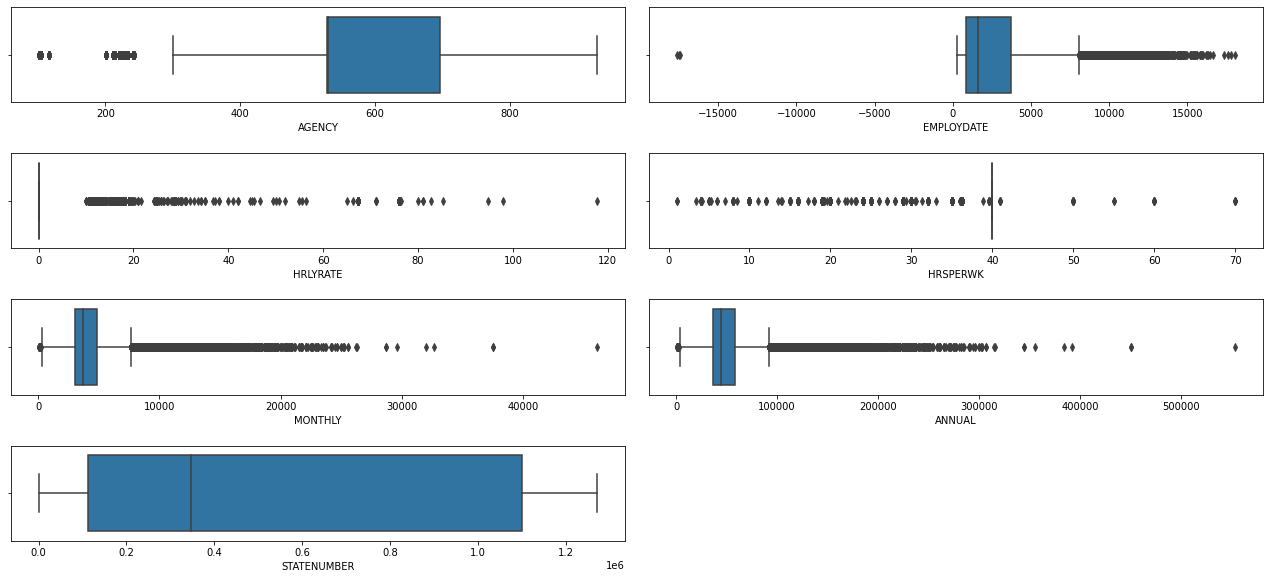

In [ ]:
plt.figure(figsize=(18,10))
for index,cols in enumerate(numaric_data):
    plt.subplot(5,2,index+1)
    sns.boxplot(numaric_data.loc[:,cols])
plt.tight_layout(pad=2)

In [ ]:
print(numaric_data['EMPLOYDATE'].median())
print(numaric_data['HRLYRATE'].median())
print(numaric_data["HRSPERWK"].median())
print(numaric_data["MONTHLY"].median())
print(numaric_data["ANNUAL"].median())

1619.0
0.0
40.0
3720.17
44642.04


In [ ]:
mean = np.mean(numaric_data["AGENCY"]) 
std = np.std(numaric_data["AGENCY"]) 
threshold = 3.5
outlier = [] 
for i in numaric_data["AGENCY"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in charges are ', outlier) 

Outlier in charges are  []


In [ ]:
numaric_data.columns

Index(['AGENCY', 'EMPLOYDATE', 'HRLYRATE', 'HRSPERWK', 'MONTHLY', 'ANNUAL',
       'STATENUMBER'],
      dtype='object')

In [ ]:
mean = np.mean(numaric_data['EMPLOYDATE']) 
std = np.std(numaric_data['EMPLOYDATE']) 
threshold = 3.5
outlier1 = [] 
for i in numaric_data['EMPLOYDATE']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier1.append(i) 
print('\033[1mOutlier in charges are ', outlier1)
for i in numaric_data:
    numaric_data.replace(i,1616.0)

Outlier in charges are  [12081, 14077, 12707, 16227, 12901, 11824, 11321, 13687, 11339, 11763, 12221, 14442, 12945, 11319, 12063, 11636, 11367, 15213, 13110, 13712, 11763, 13955, 13224, 12244, 12494, 13682, 15416, 11516, 11673, 11763, 12494, 14100, 12494, 11643, 11763, 13137, 11873, 11473, 13224, 12981, 11763, 11763, 13680, 13572, 16192, 11942, 13088, 13711, 11308, 11732, 11415, 13224, 15903, 12494, 11761, 12847, 13243, 13955, 11906, 11895, 12494, 14527, 13484, 16634, 13434, 12494, 11762, 15903, 15493, 11763, 11763, 12494, 12981, 12525, 11339, 13955, 11639, 12525, 11786, 11730, 13641, 14077, 14588, 14721, 12494, 11885, 13952, 14684, 12494, 13590, 14685, 15598, 14439, 13955, 13851, 14047, 12967, 11763, 13012, 13650, 11391, 14565, 12494, 12423, 11492, 11763, 14077, 13224, 11763, 11783, 13809, 13672, 11367, 11958, 13438, 11447, 13012, 11593, 13512, 12524, 11454, 11531, 12140, 11601, 11614, 11748, 11429, 12251, 11367, 12931, 12035, 11748, 11367, 12363, 12160, 11748, 13323, 11520, 12210, 12

In [ ]:
mean = np.mean(numaric_data['HRLYRATE']) 
std = np.std(numaric_data['HRLYRATE']) 
threshold = 3.5
outlier2 = [] 
for i in numaric_data['HRLYRATE']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier2.append(i) 
print('\033[1mOutlier in charges are ', outlier2) 
for i in numaric_data:
    numaric_data.replace(i,0.0)

Outlier in charges are  [75.9615, 81.04454, 75.9615, 81.04453000000002, 49.40717, 28.58, 25.0, 17.33, 20.000020000000006, 30.16251, 16.01272, 19.0, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 67.30765, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.9615, 67.30765, 67.30765, 67.30765, 75.9615, 75.9615, 75.9615, 75.9615, 75.9615, 67.30765, 75.9615, 75.9615, 75.96

In [ ]:
mean = np.mean(numaric_data["HRSPERWK"]) 
std = np.std(numaric_data["HRSPERWK"]) 
threshold = 3.5
outlier3 = [] 
for i in numaric_data["HRSPERWK"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier3.append(i) 
print('\033[1mOutlier in charges are ', outlier3) 
for i in numaric_data:
    numaric_data.replace(i,40.0)

Outlier in charges are  [50.0, 60.0, 55.0, 60.0, 50.0, 70.0, 55.0, 60.0, 70.0, 50.0, 60.0, 70.0, 50.0, 50.0, 50.0, 60.0, 50.0, 70.0, 60.0, 50.0]


In [ ]:
mean = np.mean(numaric_data["MONTHLY"]) 
std = np.std(numaric_data["MONTHLY"]) 
threshold = 3.5
outlier4 = [] 
for i in numaric_data["MONTHLY"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier4.append(i) 
print('\033[1mOutlier in charges are ', outlier4) 
for i in numaric_data:
    numaric_data.replace(i,3720.17)

Outlier in charges are  [12899.0, 13000.0, 17300.0, 12848.38, 14985.5, 14583.34, 12500.0, 13371.45, 14166.67, 12334.38, 11862.5, 14000.0, 16800.0, 16800.0, 16800.0, 16800.0, 16800.0, 16800.0, 17050.0, 16800.0, 16800.0, 16800.0, 16800.0, 17050.0, 15400.0, 16800.0, 15400.0, 14000.0, 15400.0, 12166.67, 12166.67, 12750.0, 12750.0, 12500.0, 13333.34, 12750.0, 16451.25, 12166.67, 11666.67, 11666.66, 12375.83, 12833.33, 12833.33, 12833.33, 12833.33, 15400.0, 12833.33, 15400.0, 15650.0, 12833.33, 15400.0, 15400.0, 12833.33, 15650.0, 12833.33, 15400.0, 12833.33, 15400.0, 12833.33, 15650.0, 12833.33, 15400.0, 14116.66, 14116.66, 15650.0, 14116.66, 15400.0, 14116.66, 12833.33, 15400.0, 15650.0, 12833.33, 15400.0, 15400.0, 15400.0, 12833.33, 12833.33, 12833.33, 12833.33, 12833.33, 14116.66, 14116.66, 15400.0, 15650.0, 12833.33, 12833.33, 15400.0, 15400.0, 15650.0, 13041.66, 12833.33, 15400.0, 15400.0, 14116.66, 15400.0, 15650.0, 15400.0, 15650.0, 15400.0, 14345.83, 12833.33, 15400.0, 15400.0, 1411

In [ ]:
mean = np.mean(numaric_data["ANNUAL"]) 
std = np.std(numaric_data["ANNUAL"]) 
threshold = 3.5
outlier4 = [] 
for i in numaric_data["ANNUAL"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier4.append(i) 
print('\033[1mOutlier in charges are ', outlier4) 
for i in numaric_data:
    numaric_data.replace(i,44642.04)

Outlier in charges are  [154788.0, 156000.0, 207600.0, 154180.56, 179826.0, 175000.08, 150000.0, 160457.4, 170000.04, 148012.56, 142350.0, 168000.0, 201600.0, 201600.0, 201600.0, 201600.0, 201600.0, 201600.0, 204600.0, 201600.0, 201600.0, 201600.0, 201600.0, 204600.0, 184800.0, 201600.0, 184800.0, 168000.0, 184800.0, 146000.04, 146000.04, 153000.0, 153000.0, 150000.0, 160000.08, 153000.0, 197415.0, 146000.04, 140000.04, 139999.92, 148509.96, 153999.96, 153999.96, 153999.96, 153999.96, 184800.0, 153999.96, 184800.0, 187800.0, 153999.96, 184800.0, 184800.0, 153999.96, 187800.0, 153999.96, 184800.0, 153999.96, 184800.0, 153999.96, 187800.0, 153999.96, 184800.0, 169399.92, 169399.92, 187800.0, 169399.92, 184800.0, 169399.92, 153999.96, 184800.0, 187800.0, 153999.96, 184800.0, 184800.0, 184800.0, 153999.96, 153999.96, 153999.96, 153999.96, 153999.96, 169399.92, 169399.92, 184800.0, 187800.0, 153999.96, 153999.96, 184800.0, 184800.0, 187800.0, 156499.92, 153999.96, 184800.0, 184800.0, 169399

In [ ]:
numaric_data.drop('MONTHLY',axis=1)

AGENCY  EMPLOYDATE  HRLYRATE  HRSPERWK     ANNUAL  STATENUMBER
0          241       12081  75.96150      29.0  114549.84       127717
1          212        2236  81.04454       4.0   16857.24       127717
2          241         410  75.96150      29.0  114549.84        59115
3          212         928  81.04453       4.0   16857.24        59115
4          696         261   0.00000      40.0   39411.24       165030
...        ...         ...       ...       ...        ...          ...
149476     809        1234   0.00000      40.0   34788.00       770781
149477     809        2074   0.00000      40.0   66000.00       847431
149478     809        3075  12.93000      20.0   13447.20        34266
149479     809       11499   0.00000      40.0   68929.92       123490
149480     809        3317  11.74000      20.0   12209.52       103583

[149481 rows x 6 columns]

In [ ]:
import scipy.stats as stat
import pylab
#### Q-Q plot
def plot_data(numaric_data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    numaric_data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(numaric_data[feature],dist='norm',plot=pylab)
    plt.show()

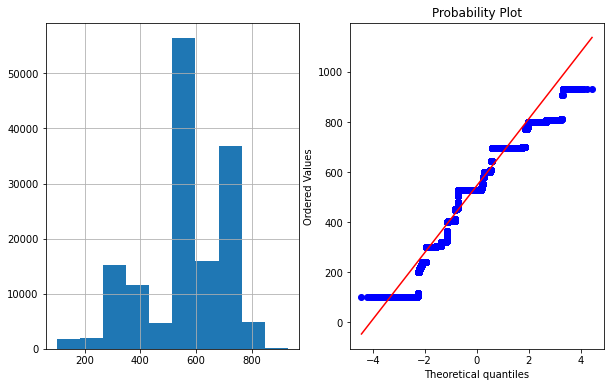

In [ ]:
plot_data(numaric_data,'AGENCY')

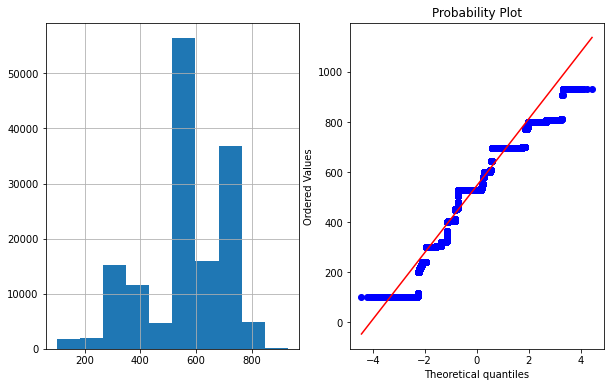

In [ ]:
plot_data(numaric_data,'AGENCY')

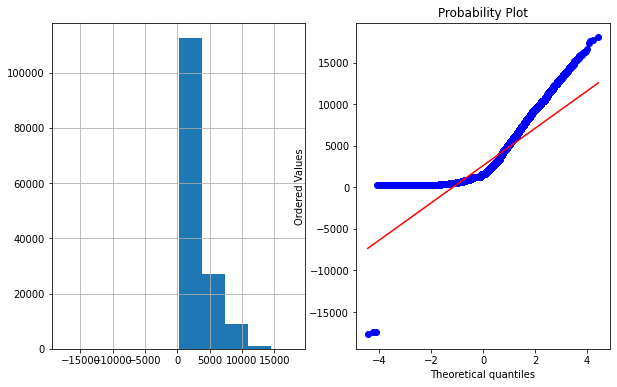

In [ ]:
plot_data(numaric_data,'EMPLOYDATE')

In [ ]:
numaric_data['EMPLOYDATE'].skew()#=np.log(numaric_data['EMPLOYDATE'])
#plot_data(numaric_data,'EMPLOYDATE')

1.4950306960005597

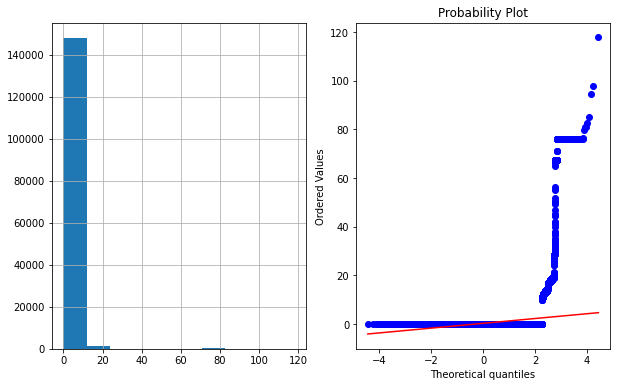

In [ ]:
plot_data(numaric_data,'HRLYRATE')

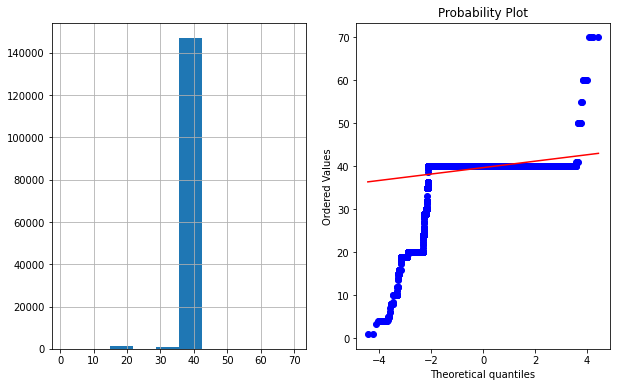

In [ ]:
plot_data(numaric_data,'HRSPERWK')

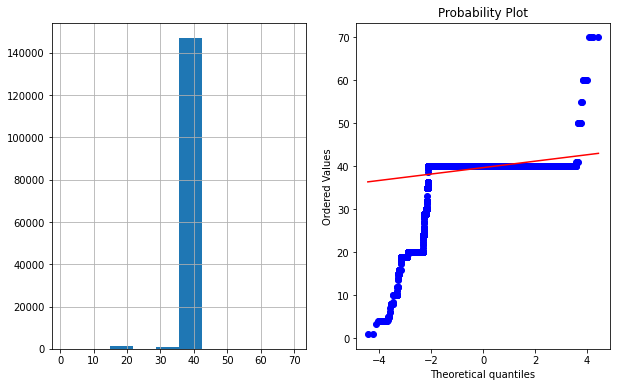

In [ ]:
numaric_data['HRSPERWK_log']=np.sqrt(numaric_data['HRSPERWK'])
plot_data(numaric_data,'HRSPERWK')

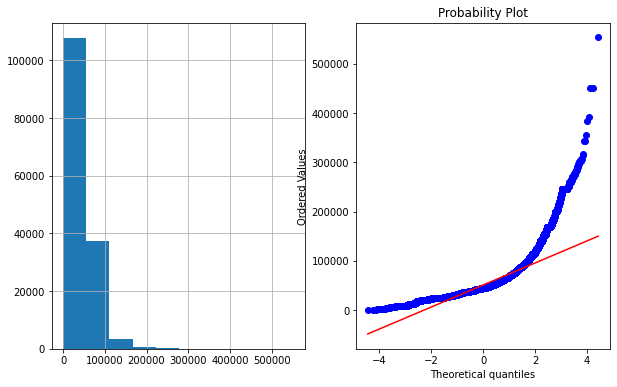

In [ ]:
plot_data(numaric_data,'ANNUAL')

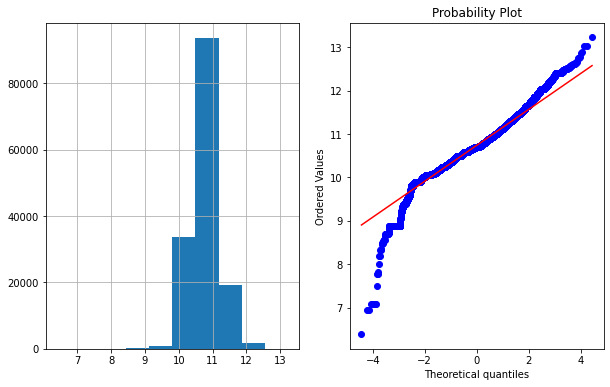

In [ ]:
numaric_data['ANNUAL_log']=np.log(numaric_data['ANNUAL'])
plot_data(numaric_data,'ANNUAL_log')

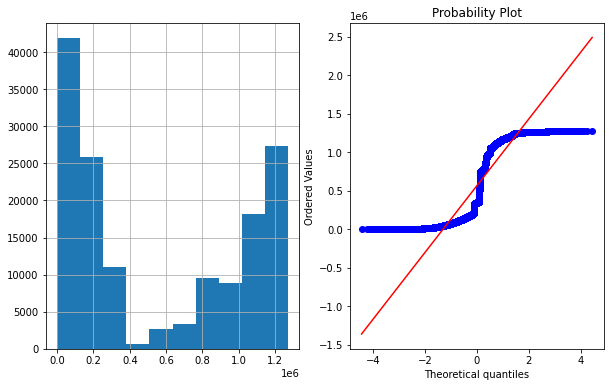

In [ ]:
plot_data(numaric_data,'STATENUMBER')

In [ ]:
after_EDA_data

AGENCYNAME  LASTNAME  FIRSTNAME  MI  CLASSCODE  CLASSTITLE  GENDER  \
0             1033        12          2  11        324         324       1   
1              266        12          2  11         47          47       1   
2             1033         2       1384  17        324         324       1   
3              266         2       1384  17         47          47       1   
4            35926        30         88   6       9267        9267       0   
...            ...       ...        ...  ..        ...         ...     ...   
149476         221         4       1384  22        385         385       1   
149477         221        15         35  13         48          48       0   
149478         221       228         89  20        221         221       1   
149479         221       231        162  14       1083        1082       1   
149480         221         6         32  22        221         221       0   

        ETHNICITY_ASIAN            ETHNICITY_BLACK            \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
149476                          0                          0   
149477                          0                          0   
149478                          0                          0   
149479                          0                          0   
149480                          0                          0   

        ETHNICITY_HISPANIC         ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               1  ...   
...                           ...  ...   
149476                          0  ...   
149477                          0  ...   
149478                          0  ...   
149479                          0  ...   
149480                          0  ...   

        STATUS_URP - UNCLASSIFIED REGULAR PART-TIME      \
0                                                     1   
1                                                     0   
2                                                     1   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME    \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME    AGENCY  EMPLOYDATE  \
0                                                     0     241       12081   
1                                                     0     212        2236   
2                                                     0     241         410   
3                                                     0     212

In [ ]:
after_EDA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 29 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   AGENCYNAME                                       149481 non-null  int64  
 1   LASTNAME                                         149481 non-null  int64  
 2   FIRSTNAME                                        149481 non-null  int64  
 3   MI                                               149481 non-null  int64  
 4   CLASSCODE                                        149481 non-null  int64  
 5   CLASSTITLE                                       149481 non-null  int64  
 6   GENDER                                           149481 non-null  int64  
 7   ETHNICITY_ASIAN                                  149481 non-null  uint8  
 8   ETHNICITY_BLACK                                  149481 non-null  uint8  
 9   ETHNICITY_HISPA

In [ ]:
#pip install smogn

In [ ]:
#import smogn

#df_smogn = smogn.smoter(data = after_EDA_data,y = 'ANNUAL'  ## string ('header name'))

# modeling 

In [ ]:
X=after_EDA_data.iloc[:,:-1]

In [ ]:
X

AGENCYNAME  LASTNAME  FIRSTNAME  MI  CLASSCODE  CLASSTITLE  GENDER  \
0             1033        12          2  11        324         324       1   
1              266        12          2  11         47          47       1   
2             1033         2       1384  17        324         324       1   
3              266         2       1384  17         47          47       1   
4            35926        30         88   6       9267        9267       0   
...            ...       ...        ...  ..        ...         ...     ...   
149476         221         4       1384  22        385         385       1   
149477         221        15         35  13         48          48       0   
149478         221       228         89  20        221         221       1   
149479         221       231        162  14       1083        1082       1   
149480         221         6         32  22        221         221       0   

        ETHNICITY_ASIAN            ETHNICITY_BLACK            \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
149476                          0                          0   
149477                          0                          0   
149478                          0                          0   
149479                          0                          0   
149480                          0                          0   

        ETHNICITY_HISPANIC         ...  \
0                               0  ...   
1                               0  ...   
2                               0  ...   
3                               0  ...   
4                               1  ...   
...                           ...  ...   
149476                          0  ...   
149477                          0  ...   
149478                          0  ...   
149479                          0  ...   
149480                          0  ...   

        STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME      \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_URP - UNCLASSIFIED REGULAR PART-TIME      \
0                                                     1   
1                                                     0   
2                                                     1   
3                                                     0   
4                                                     0   
...                                                 ...   
149476                                                0   
149477                                                0   
149478                                                0   
149479                                                0   
149480                                                0   

        STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME    \
0                                                     0   
1                                                     0   
2                                                     0   
3                                                     0   
4                                                     0   
...                      

In [ ]:
y=after_EDA_data.iloc[:,-1]

In [ ]:
y

0         127717
1         127717
2          59115
3          59115
4         165030
           ...  
149476    770781
149477    847431
149478     34266
149479    123490
149480    103583
Name: STATENUMBER, Length: 149481, dtype: int64

# feature scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_X=scaler.fit_transform(X)

In [ ]:
#pd.DataFrame(scaled_data_X)

# feature selection 
## univariate selection

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [ ]:
### Apply SelectKBest Algorithm
#ordered_rank_features=f_classif(score_func=chi2,k=20)
#ordered_feature=ordered_rank_features.fit(X,y)

In [ ]:
def f_regression(X,Y):
    import sklearn
    return sklearn.feature_selection.f_regression(scaled_data_X,Y,center=False)
from sklearn.feature_selection import SelectKBest
featureSelector = SelectKBest(score_func=f_regression,k=27)
featureSelector.fit(scaled_data_X,y)

SelectKBest(k=27, score_func=<function f_regression at 0x7f35785da0d0>)

In [ ]:
dfscores=pd.DataFrame(featureSelector.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [ ]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank

Features         Score
0                                        AGENCYNAME    296.292450
1                                          LASTNAME      3.857791
2                                         FIRSTNAME    304.509509
3                                                MI    326.120782
4                                         CLASSCODE   1022.632579
5                                        CLASSTITLE   1022.270923
6                                            GENDER      0.616595
7                         ETHNICITY_ASIAN               45.573619
8                         ETHNICITY_BLACK              183.554873
9                         ETHNICITY_HISPANIC             3.504099
10                        ETHNICITY_OTHER              268.791251
11                        ETHNICITY_WHITE              337.804327
12  STATUS_CRP - CLASSIFIED REGULAR PART-TIME            8.938119
13  STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME        644.938899
14  STATUS_CTP - CLASSIFIED TEMPORARY FULL-TIME          0.799850
15  STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME         17.194149
16  STATUS_ERF - EXEMPT REGULAR FULL-TIME               16.726746
17  STATUS_ERP - EXEMPT REGULAR PART-TIME                0.318323
18  STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME          9.590262
19  STATUS_URP - UNCLASSIFIED REGULAR PART-TIME         26.404825
20  STATUS_UTF - UNCLASSIFIED TEMPORARY FULL-TIME        2.685762
21  STATUS_UTP - UNCLASSIFIED TEMPORARY PART-TIME        3.159375
22                                           AGENCY    231.237541
23                                       EMPLOYDATE  28481.552412
24                                         HRLYRATE      3.917551
25                                         HRSPERWK      6.333546
26                                          MONTHLY   4531.767049
27                                           ANNUAL   4531.767049

In [ ]:
features_rank.nlargest(20,'Score')

Features         Score
23                                       EMPLOYDATE  28481.552412
26                                          MONTHLY   4531.767049
27                                           ANNUAL   4531.767049
4                                         CLASSCODE   1022.632579
5                                        CLASSTITLE   1022.270923
13  STATUS_CTF - CLASSIFIED TEMPORARY FULL-TIME        644.938899
11                        ETHNICITY_WHITE              337.804327
3                                                MI    326.120782
2                                         FIRSTNAME    304.509509
0                                        AGENCYNAME    296.292450
10                        ETHNICITY_OTHER              268.791251
22                                           AGENCY    231.237541
8                         ETHNICITY_BLACK              183.554873
7                         ETHNICITY_ASIAN               45.573619
19  STATUS_URP - UNCLASSIFIED REGULAR PART-TIME         26.404825
15  STATUS_CTP - CLASSIFIED TEMPORARY PART-TIME         17.194149
16  STATUS_ERF - EXEMPT REGULAR FULL-TIME               16.726746
18  STATUS_URF - UNCLASSIFIED REGULAR FULL-TIME          9.590262
12  STATUS_CRP - CLASSIFIED REGULAR PART-TIME            8.938119
25                                         HRSPERWK      6.333546

In [ ]:
best_feature=features_rank.nlargest(20,'Score')

In [ ]:
x=after_EDA_data[best_feature.iloc[:,0]]

# feature importance 

In [ ]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
#model=ExtraTreesClassifier()
#model.fit(X,y)

In [ ]:
#print(model.feature_importances_)

In [ ]:
#ranked_features=pd.Series(model.feature_importances_,index=X.columns)
#ranked_features.nlargest(10).plot(kind='barh')
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((119584, 20), (29897, 20), (119584,), (29897,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# from xgboost import XGBRegressor

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('DECISIONTREE REGRESSOR',model.score(x_train,y_train)*100)
print('DECISIONTREE REGRESSOR',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

DECISIONTREE REGRESSOR 99.80047070172863
DECISIONTREE REGRESSOR 35.12909953824245
Mena Squard Error IS :      149436425859.11136
Mean Absolute Error Is :    215441.13405023914
Median Absolute Error Is :  63941.0


In [ ]:
from sklearn.metrics import precision_recall_curve,r2_score,confusion_matrix,classification_report
print(r2_score(y_test,y_predict))

0.3512909953824245


In [ ]:
param_dist = {"max_depth": [3,4,5,6], 
              "max_features":list(range(1,9)), 
              "min_samples_leaf": list(range(1, 9)), 
              "criterion": ["gini", "entropy"]} 

In [ ]:
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5) 
  
tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

In [ ]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('KNeighborsRegressor',model.score(x_train,y_train)*100)
print('KNeighborsRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# hyper parameter tunning for KNN

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
n_neighbors=list(range(1,30))
weights=['uniform','distance']
leaf_size=list(range(1,50))
algoritham=['auto', 'ball_tree', 'kd_tree', 'brute']
metric=['minkowski','Euclidean']

In [ ]:
kNN_grid={'n_neighbors':n_neighbors,'weights':weights,'leaf_size':leaf_size,'algoritham':algoritham,'metric':metric}

In [ ]:
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=KNN_grid,cv=5,random_state=42,n_jobs=1,scoring='ref')

In [ ]:
random_cv.fit(x_train,y_train)

In [ ]:
random_cv.best_estimator_
regressor.fit(X_train,y_train)

In [ ]:
#model=LogisticRegression()
#model.fit(x_train,y_train)
#y_predict=model.predict(x_test)
#print('LogisticRegression',model.score(x_train,y_train)*100)
#print('LogisticRegression',model.score(x_test,y_test)*100)
#print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
#print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
#print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# AdaBoostRegressor

In [ ]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('AdaBoostRegressor',model.score(x_train,y_train)*100)
print('AdaBoostRegressor',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# SVR

In [ ]:
model=SVR()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('SVR',model.score(x_train,y_train)*100)
print('SVR',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# LinearRegression

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# Lasso

In [ ]:
model=Lasso()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Lasso',model.score(x_train,y_train)*100)
print('Lasso',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# Ridge

In [ ]:
model=Ridge()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('Ridge',model.score(x_train,y_train)*100)
print('Ridge',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# ElasticNet

In [ ]:
model=ElasticNet()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('ElasticNet',model.score(x_train,y_train)*100)
print('ElasticNet',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

# XGBRegressor

In [ ]:
from xgboost import XGBRegressor 

In [ ]:
model=XGBRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print('LinearRegression',model.score(x_train,y_train)*100)
print('LinearRegression',model.score(x_test,y_test)*100)
print('Mena Squard Error IS :     ',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error Is :   ',mean_absolute_error(y_test, y_predict))
print('Median Absolute Error Is : ',median_absolute_error(y_test, y_predict))

LinearRegression 71.4468682400662
LinearRegression 67.57205936218078
Mena Squard Error IS :      74700913851.87233
Mean Absolute Error Is :    186841.1914664369
Median Absolute Error Is :  112158.0


In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear','dart']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
gamma=[0.1,2,3,5,100,1000]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    }

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBRegressor(),
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
random_cv.best_estimator_
#random_cv.best_estimator_
#regressor.fit(X_train,y_train)